# Problem Statement:-
    
    The table was represent weekly 2018 retail scan data for National retile volume (units) and price.
    
    Retail scan data directly comes from retailers cash registers based on actual retail sales of Hass avocados.
    
    Starting in 2013, the tale below reflects an expanded,multi - outlet retail dataset. Multi-outlet report 
    
    includes an aggregation of following channels:grocery, mass, club,drug,dollar and millatary. The average price
        
    (of avocados) in the table reflects a per unit(per avocados) cost, even when multiple units(avocados) sold in bags.
    
    The product look up codes (PLU's) in the table are only for Hass Avocados. Other varieties of Avocados(eg.green skins)
                               
    are not included in this table.
                               
                               

# Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

from sklearn import metrics

from  sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import matplotlib

import warnings
warnings.filterwarnings('ignore')

from sklearn import svm

# Importing Dataset

In [2]:
df=pd.read_csv("avocado.csv")

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Cheking shape of Dataset

In [4]:
df.shape

(18249, 14)

# Some relavent columns in dataset

#Date =  Date of the observation

#Average price=Average price of single Avocado

#Type = conventional or Organic

#Year =  The year

#Region = The city or region of the observation

#Total volume = Total no of Avocados sold

#4046 = The no of Avocados with PLU - 4046 - sold

#4225 - The no of Avocados with PLU - 4225 - sold

#4770 - The no of Avocados with PLu - 4770 - sold



# cheking is there any null variables in data set

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.describe().round(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,24.23,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,15.48,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,10.00,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,24.00,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,38.00,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,52.00,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


#Target variable seems to be normally distributed as mean and 50% is so close

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# To summarize the dataset we see

#14 columns(variables) and 18249 rows (obsevations)

#There is not any NULL variable

#data types: float(64) - 9 ,int(64) - 2, Object(3) 

#There are some unnamed and undefined columns

#'region','type',and 'date' columns are in object format

# Target of this project is to predict the future price of avocados depending on those variables we have:
# * Type   *Bags(4units) vs bundle(one unit)  *REgion  * volume  *size   *years

# Data preprocessing

In [8]:
#Drop unnamed column and rename undefined column

df = df.drop(['Unnamed: 0'],axis=1)
df = df.rename(index=str,columns={'4046':"Small Hass",'4225':"Large Hass",'4770':"XLarge Hass"})

In [9]:
#Converting Date columns format

df['Date']=pd.to_datetime(df.Date)

df.sort_values(by=['Date'],inplace = True,ascending = True)

df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


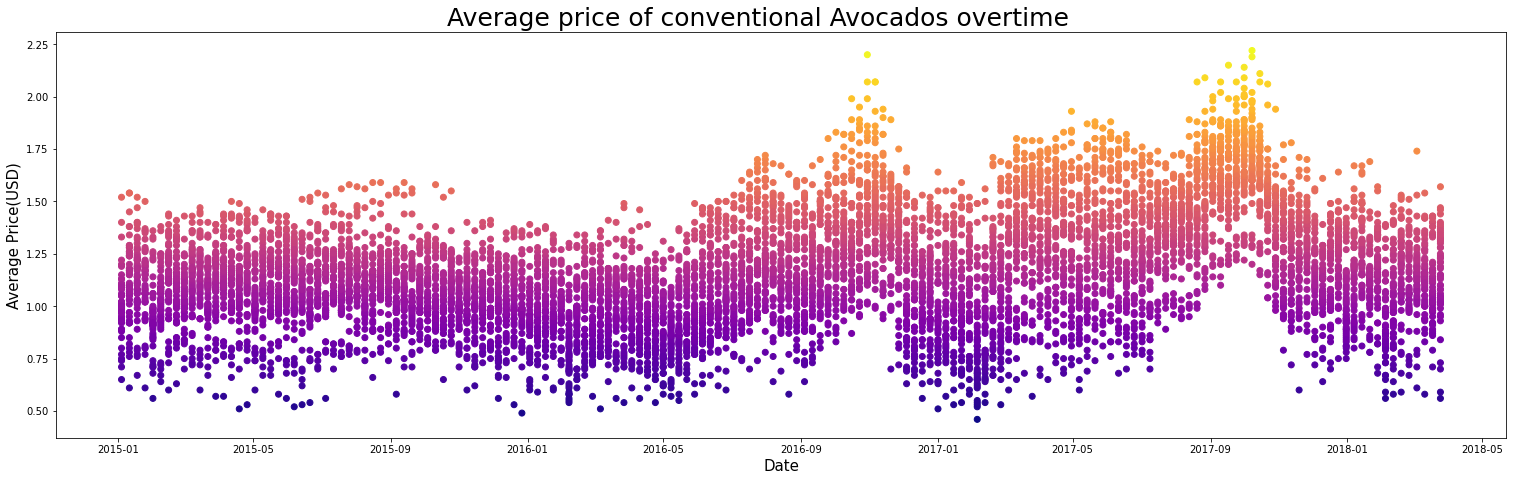

In [10]:
#Average price of Conventional Avocados Overtime

mask = df['type'] == 'conventional'
plt.rc('figure',titlesize=50)
fig =  plt.figure(figsize=(26,7))
fig.suptitle('Average price of conventional Avocados overtime', fontsize=25)
ax=fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates=df[mask]['Date'].tolist()
avgPrices=df[mask]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices,c=avgPrices,cmap='plasma')
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Average Price(USD)',fontsize = 15)
plt.show()

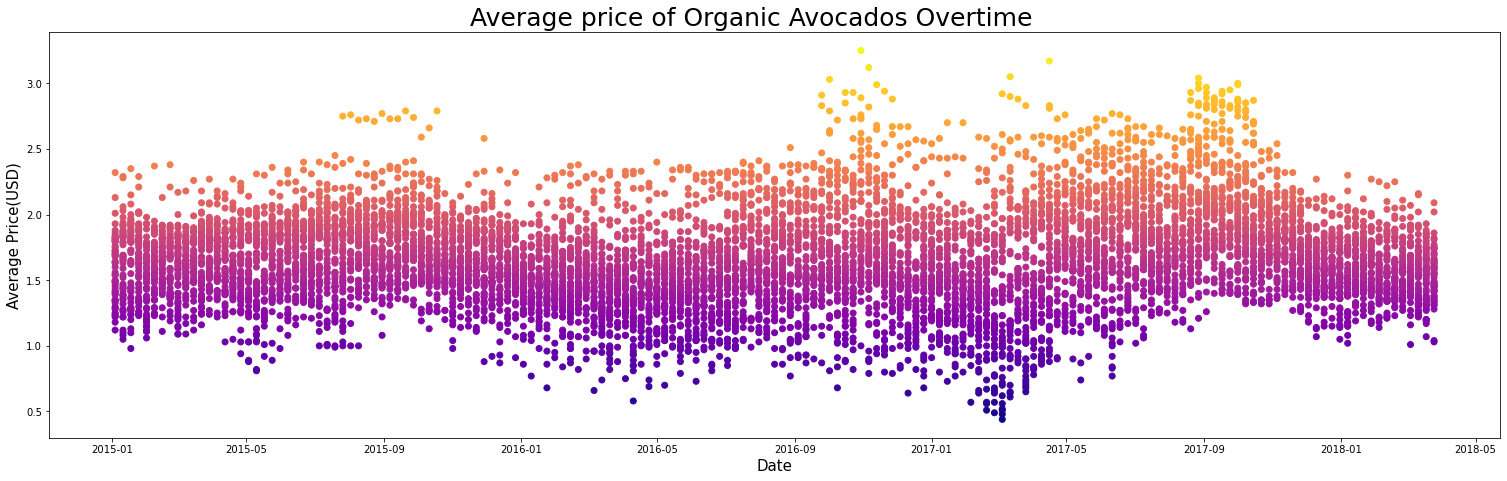

In [11]:
#Average price of Organic Avocados Overtime

mask=df['type']=='organic'
plt.rc('figure',titlesize=50)
fig=plt.figure(figsize=(26,7))
fig.suptitle('Average price of Organic Avocados Overtime',fontsize=25)
ax=fig.add_subplot(111)
fig.subplots_adjust(top=0.93)


dates = df[mask]['Date'].tolist()
avgPrices=df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices,cmap='plasma')
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Average Price(USD)',fontsize = 15)
plt.show()

# Model Building

In [12]:
#Dropping the Date column not required for model building

df = df.drop(['Date'],axis=1)

In [13]:
#Checking if the sample is balanced

df.groupby('region').size()


region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

#Approximately,there are 338 observations from each region,sample seems balanced

In [14]:
len(df.region.unique())

54

In [15]:
df.region.unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

#There are 54 regions but some of subsets of the other regions i.e sanfransico - california

In [16]:
#Basically we can remove  states and work on cities rather than analysing both(to prevent multicolliniarity)

regionsToRemove =['California','GreatLakes','Midsouth','NewYork','Northeast','SouthCorolina','Plains','SouthCentral',
                   'Southeast','TotalUS','West']
df = df[~df.region.isin(regionsToRemove)]
len(df.region.unique())

44

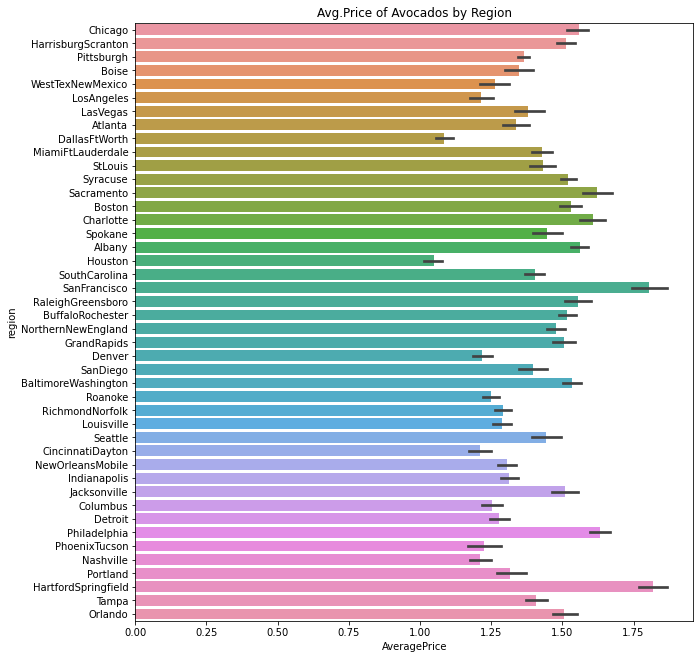

In [17]:
#The average prices by regions

plt.figure(figsize=(10,11))
plt.title("Avg.Price of Avocados by Region")
Av=sns.barplot(x="AveragePrice",y="region",data=df)

In [18]:
type_counts = df.groupby('type').size()
print(type_counts)



type
conventional    7436
organic         7433
dtype: int64


#Type of Avocados are also balanced since the ratio is almost 0.5

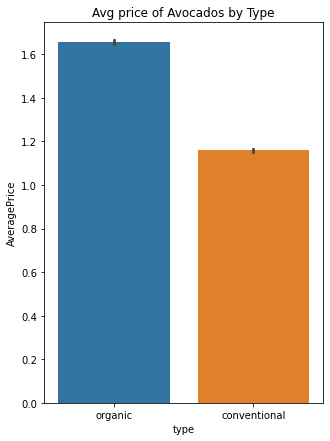

In [19]:
#The average prices of Avocados by types; organic or not

plt.figure(figsize =(5,7))
plt.title("Avg price of Avocados by Type")
Av=sns.barplot(x="type",y="AveragePrice",data = df)

In [20]:
#Total bags = Small Bags+Large Bags+XLarge Bags

#To avoid multicollinearity I'll keep S-L-XL bags and drop Total Bags

#But before dropping we'be better to see the correlation between those columns:

df[['Small Hass','Large Hass','XLarge Hass','Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
Small Hass,1.000000,0.505679,0.412950,0.654362,0.349850,0.454055,0.890557,0.684774
Large Hass,0.505679,1.000000,0.580146,0.564352,0.267020,0.308973,0.787692,0.577870
XLarge Hass,0.412950,0.580146,1.000000,0.437542,0.121859,0.490949,0.576885,0.429382
Small Bags,0.654362,0.564352,0.437542,1.000000,0.239977,0.658028,0.837191,0.956952
Large Bags,0.349850,0.267020,0.121859,0.239977,1.000000,0.081916,0.430701,0.510694
XLarge Bags,0.454055,0.308973,0.490949,0.658028,0.081916,1.000000,0.548969,0.622533
Total Volume,0.890557,0.787692,0.576885,0.837191,0.430701,0.548969,1.000000,0.870140
Total Bags,0.684774,0.577870,0.429382,0.956952,0.510694,0.622533,0.870140,1.000000


<AxesSubplot:>

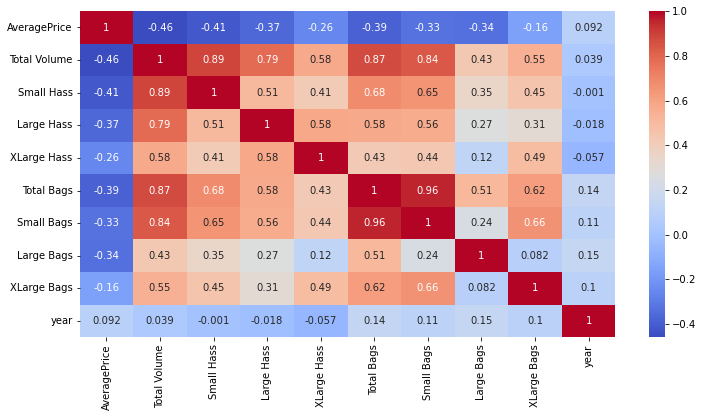

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot= True)

# cells which are Dark are Strongly correlated

#There is high correlation between those pairs:

#small hass & total volume(0.89)

#total bags & total volume(0.87)

#small bags & total bags(0.96)

#Small hass Avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk,not bag

#Retailer want to increase the sales of bagged Avocados instead of bulks.They think this is more advantageous for them

#Total bags variable has a very high correlation with total volume(Total sales) and small bags, so we can say that most of

the bagged sales comes from the samll bags

In [22]:
df_V= df.drop(['AveragePrice','Total Volume','Total Bags'],axis=1).groupby('year').agg('sum')
df_V

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,4.044311e+08,3.846446e+08,35421591.41,1.455653e+08,28963319.12,1324692.95
2016,3.456552e+08,3.729140e+08,38316442.88,2.667529e+08,82466949.79,4919552.32
2017,3.755805e+08,3.447477e+08,23116733.44,2.860924e+08,94978110.96,5548459.75
2018,1.039321e+08,9.059242e+07,5850400.70,8.093611e+07,28805803.96,1626531.52


Text(0, 0.5, '')

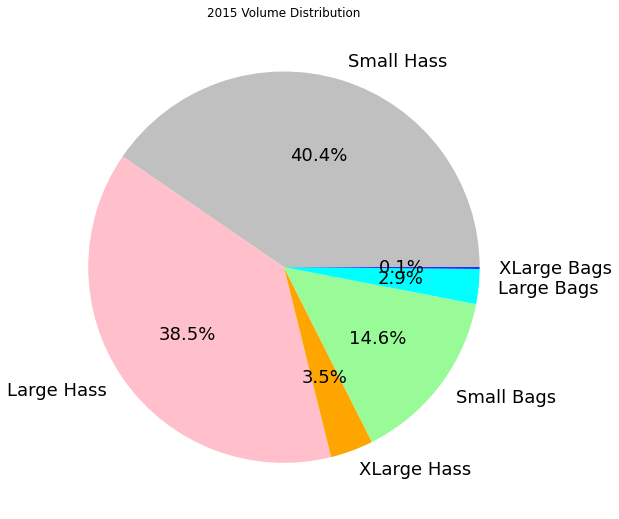

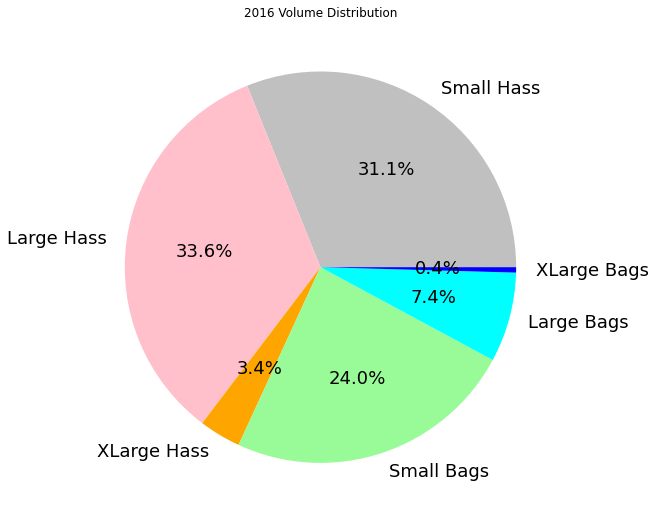

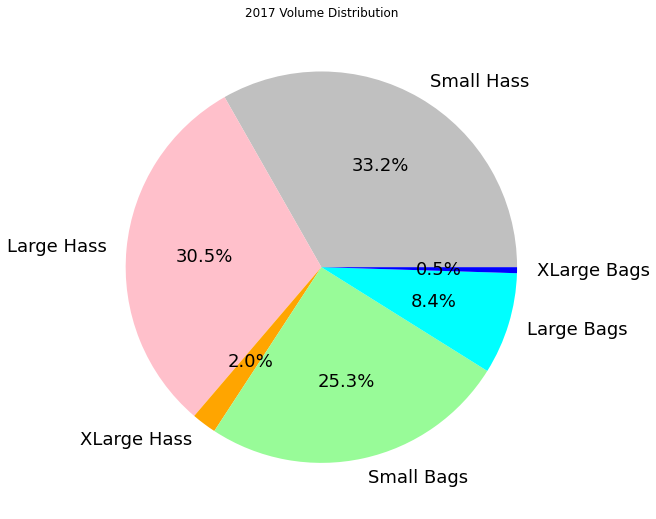

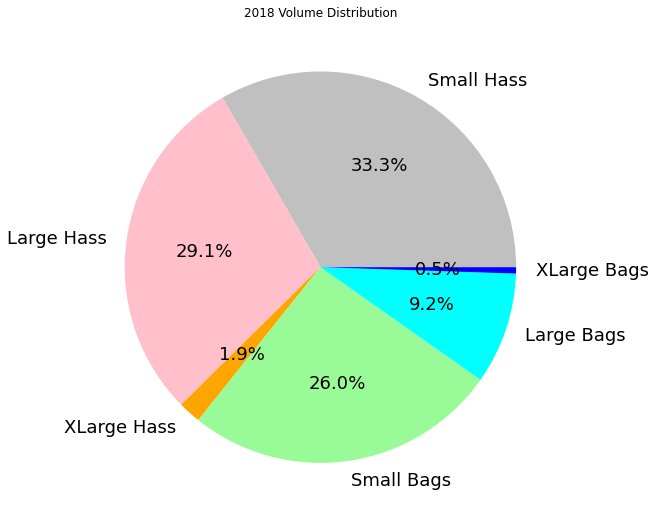

In [23]:
indexes =  ['Small Hass','Large Hass','XLarge Hass','Small Bags','Large Bags','XLarge Bags']
series = pd.DataFrame({'2015':df_V.loc[[2015],:].values.tolist()[0],
                   '2016':df_V.loc[[2016],:].values.tolist()[0],
                   '2017':df_V.loc[[2017],:].values.tolist()[0],
                    '2018':df_V.loc[[2018],:].values.tolist()[0]},index = indexes)
series.plot.pie(y='2015',figsize=(9,9),autopct='%1.1f%%',colors=['silver','pink','orange','palegreen','aqua','blue'],fontsize=18,legend=False,title='2015 Volume Distribution').set_ylabel('')
series.plot.pie(y='2016',figsize=(9,9),autopct='%1.1f%%',colors=['silver','pink','orange','palegreen','aqua','blue'],fontsize=18,legend=False,title='2016 Volume Distribution').set_ylabel('')
series.plot.pie(y='2017',figsize=(9,9),autopct='%1.1f%%',colors=['silver','pink','orange','palegreen','aqua','blue'],fontsize=18,legend=False,title='2017 Volume Distribution').set_ylabel('')
series.plot.pie(y='2018',figsize=(9,9),autopct='%1.1f%%',colors=['silver','pink','orange','palegreen','aqua','blue'],fontsize=18,legend=False,title='2018 Volume Distribution').set_ylabel('')
                
                

In [24]:
#Total Bags = Small Bags+Large Bags+XLarge Bags

df = df.drop(['Total Bags'],axis=1)


In [25]:
#Total Volume = Small Hass+Large Hass+XLarge Hass+Total Bags, to avoid multicollinearity I also drop Total Volume column

df = df.drop(['Total Volume'],axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14869 entries, 9593 to 8574
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14869 non-null  float64
 1   Small Hass    14869 non-null  float64
 2   Large Hass    14869 non-null  float64
 3   XLarge Hass   14869 non-null  float64
 4   Small Bags    14869 non-null  float64
 5   Large Bags    14869 non-null  float64
 6   XLarge Bags   14869 non-null  float64
 7   type          14869 non-null  object 
 8   year          14869 non-null  int64  
 9   region        14869 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.8+ MB


In [27]:
#Scaling/Standardizing the variables

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df.loc[:,'Small Hass':'XLarge Bags']=scaler.fit_transform(df.loc[:,'Small Hass':'XLarge Bags'])
df.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.406517,-0.472261,-0.348091,-0.421772,-0.373649,-0.231834,organic,2015,Chicago
10009,1.68,-0.411643,-0.585001,-0.348091,-0.408486,-0.373649,-0.231834,organic,2015,HarrisburgScranton
1819,1.52,-0.397421,-0.327301,-0.269390,-0.336947,-0.287191,-0.231834,conventional,2015,Pittsburgh
9333,1.64,-0.412443,-0.578256,-0.348091,-0.427659,-0.369216,-0.231834,organic,2015,Boise
2807,0.75,1.716637,0.495159,0.421326,0.923551,-0.307240,-0.231834,conventional,2015,WestTexNewMexico


In [28]:
#Specifying dependent and independent variables

X=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']
y=np.log1p(y)

In [29]:
#Labeling the Categorical variable

Xcat=pd.get_dummies(X[['type','region']],drop_first=True)

In [30]:
Xnum=X[['Small Hass','Large Hass','XLarge Hass','Small Bags','Large Bags','XLarge Bags']]

In [31]:
#Concatinating dummy categorical variable and nuemerical variable

X=pd.concat([Xcat,Xnum],axis=1)
X.shape

(14869, 50)

In [32]:
F_DF=pd.concat([y,X],axis=1)
F_DF.head(2)

,AveragePrice,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
9593,0.912283,1,0,0,0,0,0,0,1,0,...,0,0,0,0,-0.406517,-0.472261,-0.348091,-0.421772,-0.373649,-0.231834
10009,0.985817,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.411643,-0.585001,-0.348091,-0.408486,-0.373649,-0.231834


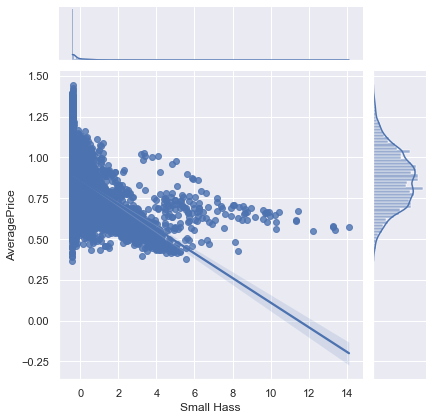

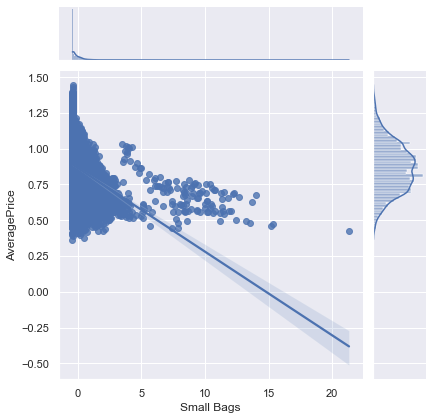

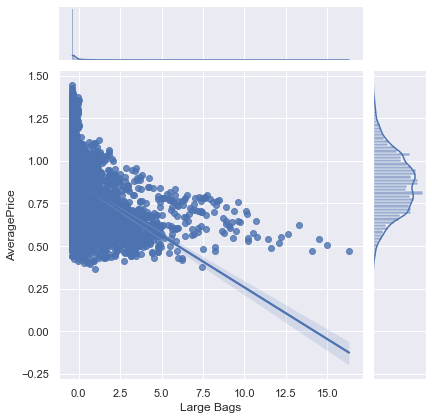

In [33]:
#Just before the regression analysis,i want to visualize the highly correlated variables with the average prices

sns.set(color_codes=True)
sns.jointplot(x='Small Hass',y='AveragePrice',data=F_DF,kind='reg')
sns.jointplot(x='Small Bags',y='AveragePrice',data=F_DF,kind='reg')
sns.jointplot(x='Large Bags',y='AveragePrice',data=F_DF,kind='reg')

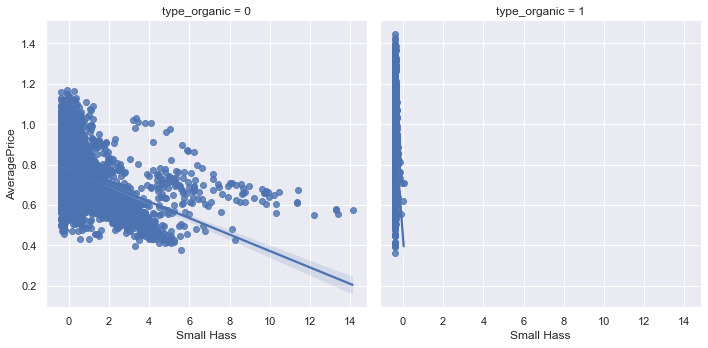

In [34]:
sns.lmplot(x='Small Hass',y='AveragePrice',col='type_organic',data=F_DF,col_wrap=2);


#Graph dipict that organic Avocados have less elasiticity to the price,compared to conventional ones

In [35]:
#Train & test split

#since the data is a time series data (gives weekly avacado price between jan2015 and april 2018) 

# I sort it by date and then split it date due to manually(not randomly),to preserve the 'timeseries effect' on it 

#I determine the split ratio as 0.30,so train and test data are just as follows:

X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

# Implementing Machine learning models

# Multiple linear regression



In [36]:
from sklearn.linear_model import LinearRegression

LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

print("R2 of Linear Regression:",LinReg.score(X_train,y_train))

R2 of Linear Regression: 0.6535877281590774


In [37]:
print('MAE: ',metrics.mean_absolute_error(y_test,LinReg.predict(X_test)))
print("MSE:",metrics.mean_squared_error(y_test,LinReg.predict(X_test)))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,LinReg.predict(X_test))))

MAE:  0.11318493218882288
MSE: 0.020549086109547664
RMSE:  0.14334952427387984


Text(0.5, 1.0, 'Distribution of residuals')

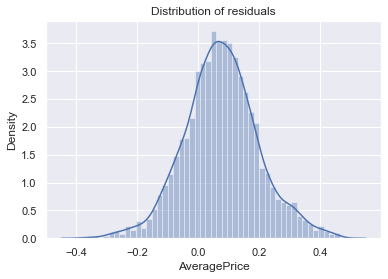

In [38]:
#Creating histogram for residuals

plt.figure(figsize=(6,4))
sns.distplot(y_test-LinReg.predict(X_test))
plt.title('Distribution of residuals')

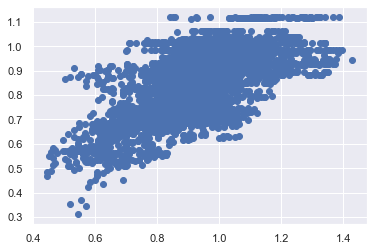

In [39]:
plt.scatter(y_test,LinReg.predict(X_test))

# Lasso and Ridge REgressions

In [40]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-5,3,20)

clf =  GridSearchCV(estimator=linear_model.Ridge(),param_grid=dict(alpha=alphas),cv=10)
clf.fit(X_train,y_train)
optlamGSCV_R=clf.best_estimator_.alpha
print('Optimum Regularization parameter(Rdige):',optlamGSCV_R)

clf=GridSearchCV(estimator=linear_model.Lasso(),param_grid=dict(alpha=alphas),cv=10)
clf.fit(X_train,y_train)
optlamGSCV_L=clf.best_estimator_.alpha
print('Optimum Regularization parameter (Lasso):',optlamGSCV_L)

Optimum Regularization parameter(Rdige): 1.1288378916846884
Optimum Regularization parameter (Lasso): 1e-05


In [41]:
ridge =  linear_model.Ridge(alpha=optlamGSCV_R)
ridge.fit(X_train,y_train)
print('RMSE value  of the Ridge model is:',np.sqrt(metrics.mean_squared_error(y_test,ridge.predict(X_test))))

RMSE value  of the Ridge model is: 0.14319881429065753


In [42]:
#Returns the co-efficeint of determination(R2) of the prediction
ridge.score(X_train,y_train)

0.6534470862717469

Text(0.5, 1.0, 'Distribution of Residuals')

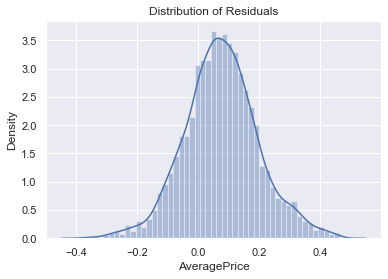

In [43]:
#Creating Histogram of residuals

plt.figure(figsize=(6,4))
sns.distplot(y_test-ridge.predict(X_test))
plt.title('Distribution of Residuals')

In [44]:
lasso=linear_model.Lasso(alpha=optlamGSCV_L)
lasso.fit(X_train,y_train)
print('RMSE value of the Lasso model is: ',np.sqrt(metrics.mean_squared_error(y_test,lasso.predict(X_test))))

RMSE value of the Lasso model is:  0.14322401805914917


In [45]:
#Returns the co-efficeint of the determination R^2 of the prediction

lasso.score(X_train,y_train)

0.6534728824523082

Text(0.5, 1.0, 'Distribution of Residuals')

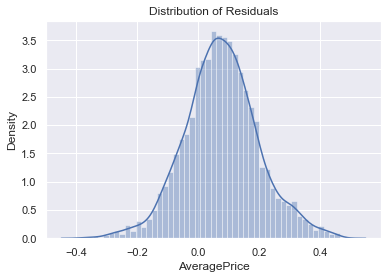

In [46]:
#Creating the Histogram of the Residuals

plt.figure(figsize=(6,4))
sns.distplot(y_test-lasso.predict(X_test))
plt.title('Distribution of Residuals')

Lasso Picked50variables and eliminated the other 0variables


Text(0.5, 1.0, 'Coefficients in the Lasso model')

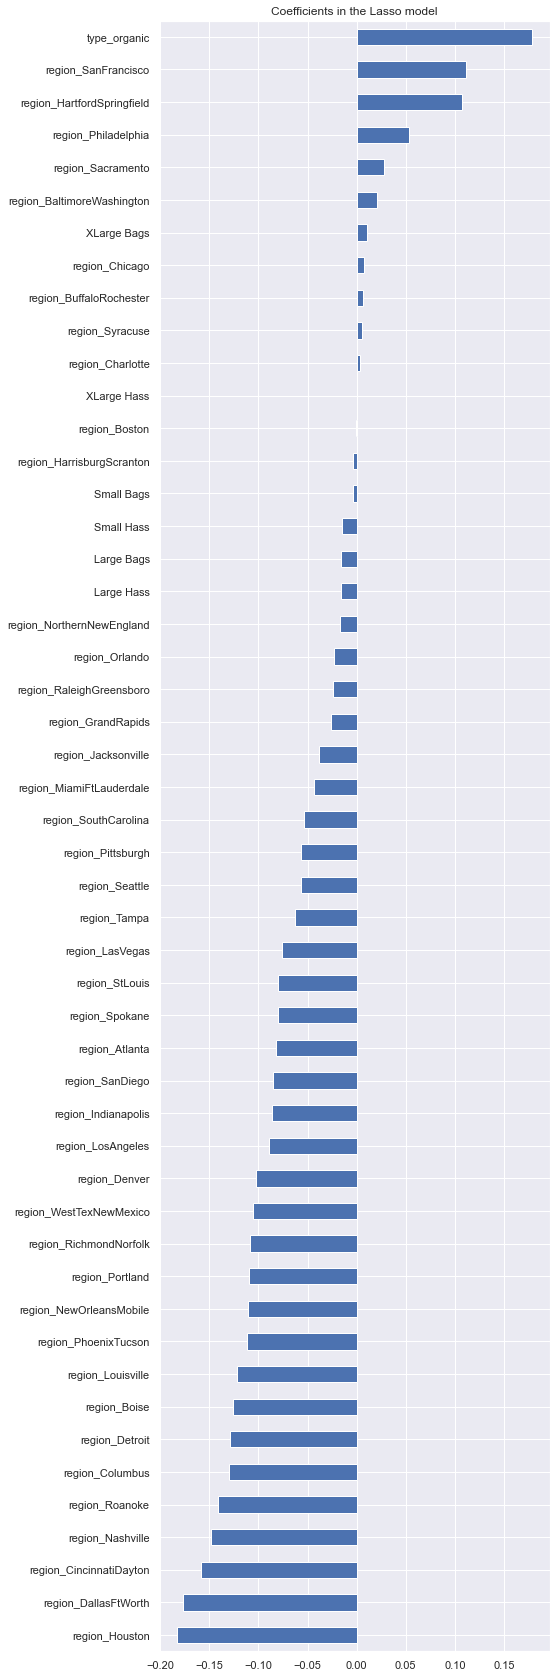

In [47]:
coef = pd.Series(lasso.coef_,index=X_train.columns)
print("Lasso Picked"+str(sum(coef !=0))+"variables and eliminated the other "+str(sum(coef==0))+"variables")
imp_coef=pd.concat([coef.sort_values()])
matplotlib.rcParams['figure.figsize']=(7.0,30.0)
imp_coef.plot(kind='barh')
plt.title("Coefficients in the Lasso model")

In [48]:
#According to RMSE results,Ridge works best compared to linear Regression and lasso

#Let's see the ML models RMSE values

# KNN REgressor

In [49]:
from sklearn import neighbors
from math import sqrt

Knn=neighbors.KNeighborsRegressor()
Knn.fit(X_train,y_train)
error=sqrt(metrics.mean_squared_error(y_test,Knn.predict(X_test)))
print('RMSE value of the KNN model is: ',error)

RMSE value of the KNN model is:  0.1412782076411315


In [50]:
#R2 of KNN model
Knn.score(X_train,y_train)

0.9293471084615897

# SVR Regressor

In [51]:
from sklearn.svm import SVR

#First,let's choose which kernal is the best  for our data

for k in ['linear','poly','rbf','sigmoid']:
    clf=svm.SVR(kernel=k)
    clf.fit(X_train,y_train)
    confidence=clf.score(X_train,y_train)
    print(k,confidence)

linear 0.6497047833194779
poly 0.7699307126255817
rbf 0.7987053149574868
sigmoid -955059.6321659146


In [52]:
#Parameter tuning to get the best accuracy

Svr =  SVR(kernel = 'rbf',C=1,gamma=0.5)


#Intutively the gamma defines how far the influence of a single training example reaches,with low value meaning 'far' and high value meaning 'close' 

#The C parameter trades off correct classification of training examples against maximization of the decision's function margin

#For Larger values of C,a smaller margin will be accepted if the decision function is better at classifying all training points correctly

#A lower C will encourage a larger margin,therefore a simpler decision funtion,at the cost of training accuracy

#In other words C behaves as a regularization parameter in SVM

In [53]:
Svr.fit(X_train,y_train)
print(Svr.score(X_train,y_train))

0.8242797203371112


In [54]:
#calculate RMSE
error =  sqrt(metrics.mean_squared_error(y_test,Svr.predict(X_test)))
print('RMSE value of SVR model is',error)

RMSE value of SVR model is 0.13564543120055267


In [55]:
#Print the first 5 predictions of the test dataset

Svr.predict(X_test)[0:5]

array([0.93952465, 0.63710744, 0.65016436, 1.0217186 , 0.87891208])

In [56]:
y_test[0:5]

17273    1.068153
8466     0.609766
15736    0.625938
15630    1.075002
14941    0.810930
Name: AveragePrice, dtype: float64

# Decision Tree REgressor

In [57]:
#Determining the best depth

from sklearn.tree import DecisionTreeRegressor

minDepth = 100
minRMSE=100000

for depth in range(2,10):
    tree_reg=DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(X_train,y_train)
    y_pred=tree_reg.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print("Depth:",depth,",MSE:",mse)
    print("Depth:",depth,",RMSE:",rmse)
    
    if rmse < minRMSE:
        minRMSE=rmse
        minDepth=depth
        
print("MinDepth:",minDepth)
print("MinRMSE:",minRMSE)

Depth: 2 ,MSE: 0.02398884097943062
Depth: 2 ,RMSE: 0.15488331407685793
Depth: 3 ,MSE: 0.024975630880619316
Depth: 3 ,RMSE: 0.15803680229813344
Depth: 4 ,MSE: 0.025989567808475538
Depth: 4 ,RMSE: 0.1612128028677485
Depth: 5 ,MSE: 0.025792906836689115
Depth: 5 ,RMSE: 0.16060170247132846
Depth: 6 ,MSE: 0.025294254583825906
Depth: 6 ,RMSE: 0.15904167561939828
Depth: 7 ,MSE: 0.025337091491659105
Depth: 7 ,RMSE: 0.15917629060780097
Depth: 8 ,MSE: 0.02472305522021389
Depth: 8 ,RMSE: 0.15723566777361264
Depth: 9 ,MSE: 0.023800141241884246
Depth: 9 ,RMSE: 0.15427294397231242
MinDepth: 9
MinRMSE: 0.15427294397231242


In [58]:
DTree=DecisionTreeRegressor(max_depth=minDepth)
DTree.fit(X_train,y_train)
print(DTree.score(X_train,y_train))

0.8225252806316187


In [59]:
print('MAE:',metrics.mean_absolute_error(y_test,DTree.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test,DTree.predict(X_test)))
print('RMSE:',metrics.mean_squared_error(y_test,DTree.predict(X_test)))      

MAE: 0.12126298573589397
MSE: 0.02384752853837405
RMSE: 0.02384752853837405


In [60]:
from sklearn.ensemble import RandomForestRegressor

RForest= RandomForestRegressor()
RForest.fit(X_train,y_train)
print(RForest.score(X_train,y_train))

0.9852726249799649


In [61]:
print('MAE:',metrics.mean_absolute_error(y_test,RForest.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test,RForest.predict(X_test)))
print('RMSE:',metrics.mean_squared_error(y_test,RForest.predict(X_test)))

MAE: 0.11493239308833797
MSE: 0.02164696958456121
RMSE: 0.02164696958456121


In [62]:

# We can save the model and later we can use it for prediction

import pickle

# saving the model to the local file system

pickle.dump(RForest,open('RForest_model','wb'))
